Import all required libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier


Lets first import the data. We will look at both red and white wine seperately.

In [29]:
# Load datasets
df_red = pd.read_csv('WineData\winequality-red.csv', sep=';')
df_white = pd.read_csv('WineData\winequality-white.csv', sep=';')

# Reclassify quality into categories
def categorize_quality(q):
    if q <= 3:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

df_red["quality_category"] = df_red["quality"].apply(categorize_quality)
df_white["quality_category"] = df_white["quality"].apply(categorize_quality)

# Prepare datasets in a dictionary for easy looping
datasets = {
    "Red Wine": df_red,
    "White Wine": df_white
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Separate features and labels
    X = df.drop(["quality", "quality_category"], axis=1)
    y = df["quality_category"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



=== Red Wine ===

=== White Wine ===


<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
<>:2: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Edwar\AppData\Local\Temp\ipykernel_33788\1713541776.py:2: SyntaxWarning: invalid escape sequence '\w'
  df_red = pd.read_csv('WineData\winequality-red.csv', sep=';')
C:\Users\Edwar\AppData\Local\Temp\ipykernel_33788\1713541776.py:3: SyntaxWarning: invalid escape sequence '\w'
  df_white = pd.read_csv('WineData\winequality-white.csv', sep=';')


Logistic Regression

C:\Users\Edwar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Logistic Regression Accuracy (3 categories): 0.786


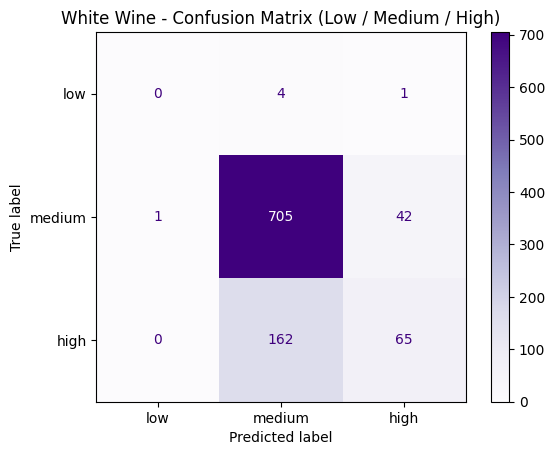

In [30]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    
# Logistic Regression (multinomial)
log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=2000, random_state=42)
log_model.fit(X_train_scaled, y_train)
    
# Predictions
y_pred = log_model.predict(X_test_scaled)
    
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy (3 categories): {acc:.3f}")
    
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
disp.plot(cmap="Purples", values_format="d")
plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
plt.show()

K-Nearest-Neighbour


=== Red Wine ===
KNN Accuracy (k=5): 0.878


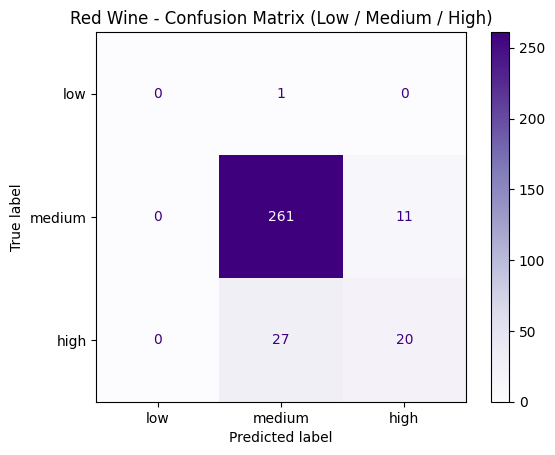


=== White Wine ===
KNN Accuracy (k=5): 0.831


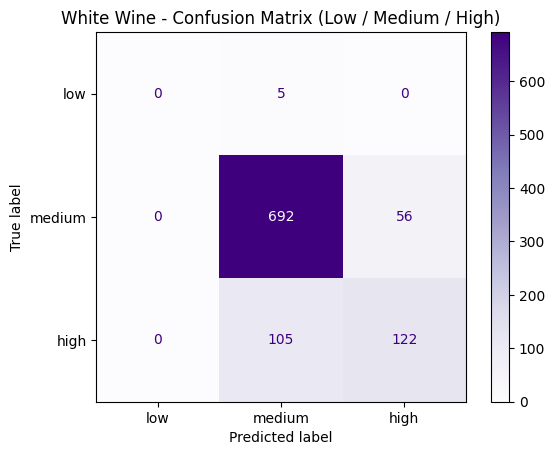

In [31]:
# Set number of neighbors for KNN
k = 5

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Separate features and labels
    X = df.drop(["quality", "quality_category"], axis=1)
    y = df["quality_category"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # K-Nearest Neighbors classifier
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = knn_model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"KNN Accuracy (k={k}): {acc:.3f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
    disp.plot(cmap="Purples", values_format="d")
    plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
    plt.show()

Neural Network

Neural Network Accuracy (3 categories, 3 layers of 15 nodes): 0.816


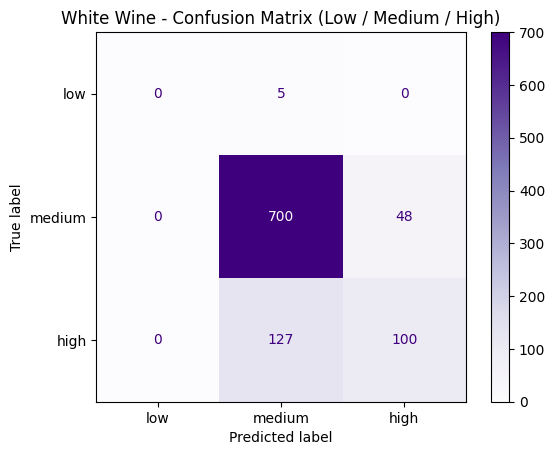

In [32]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network with 3 hidden layers, each with 15 nodes
mlp_model = MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=2000, random_state=42)
mlp_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = mlp_model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Neural Network Accuracy (3 categories, 3 layers of 15 nodes): {acc:.3f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
disp.plot(cmap="Purples", values_format="d")
plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
plt.show()


Random Forest


=== Red Wine ===
Random Forest Accuracy: 0.900


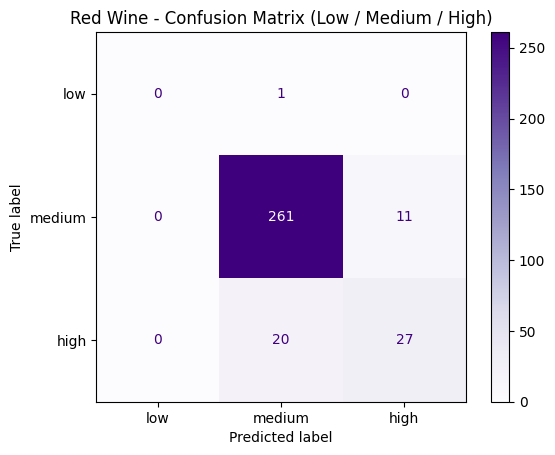


=== White Wine ===
Random Forest Accuracy: 0.885


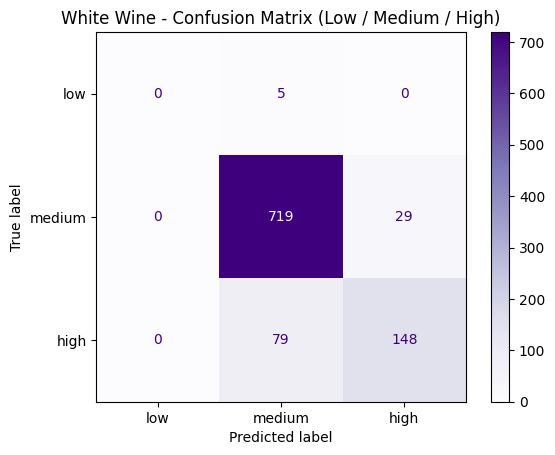

In [33]:
# Prepare datasets in a dictionary for easy looping
datasets = {
    "Red Wine": df_red,
    "White Wine": df_white
}

for name, df in datasets.items():
    print(f"\n=== {name} ===")
    
    # Separate features and labels
    X = df.drop(["quality", "quality_category"], axis=1)
    y = df["quality_category"]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Optional: Scale features (Random Forests don't require scaling, but it doesn't hurt)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test_scaled)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Random Forest Accuracy: {acc:.3f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=["low", "medium", "high"])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["low", "medium", "high"])
    disp.plot(cmap="Purples", values_format="d")
    plt.title(f"{name} - Confusion Matrix (Low / Medium / High)")
    plt.show()

From these different models, the most effective is the Random Forest model with an accuracy score of 0.9 for red wine and 0.885 for white wine.

Hence we should use this model to predict the quality of the wine based on its features.

From here, we now need to show how quality relates to price of wine. 